In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv("Top_50_Fast_Food_Chains_in_USA.csv")

In [4]:
import ydata_profiling as yp
from ydata_profiling import ProfileReport

In [5]:
#take a first look at the data
df_report=yp.ProfileReport(df)

In [6]:
df_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# Display the first 5 rows
df.head()

Fast-Food Chains  U.S. Systemwide Sales (Millions - U.S Dollars)  \
0           Arby’s                                            4462   
1   Baskin-Robbins                                             686   
2        Bojangles                                            1485   
3      Burger King                                           10033   
4       Carl’s Jr.                                            1560   

   Average Sales per Unit (Thousands - U.S Dollars)  Franchised Stores  \
0                                              1309               2293   
1                                               296               2317   
2                                              1924                496   
3                                              1470               7054   
4                                              1400               1011   

   Company Stores  2021 Total Units  Total Change in Units from 2020  
0            1116              3409                               40  
1               0              2317                              102  
2             277               773                               15  
3              51              7105                               24  
4              47              1058                              -21

In [8]:
#Display the number of variables and observations
df.shape

(50, 7)

In [9]:
df.size

350

In [10]:
# Get the detailed information of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Fast-Food Chains                                  50 non-null     object
 1   U.S. Systemwide Sales (Millions - U.S Dollars)    50 non-null     int64 
 2   Average Sales per Unit (Thousands - U.S Dollars)  50 non-null     int64 
 3   Franchised Stores                                 50 non-null     int64 
 4   Company Stores                                    50 non-null     int64 
 5   2021 Total Units                                  50 non-null     int64 
 6   Total Change in Units from 2020                   50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


In [11]:
# Display the columns
df.columns

Index(['Fast-Food Chains', 'U.S. Systemwide Sales (Millions - U.S Dollars)',
       'Average Sales per Unit (Thousands - U.S Dollars)', 'Franchised Stores',
       'Company Stores', '2021 Total Units',
       'Total Change in Units from 2020'],
      dtype='object')

## Colums and Their Descriptions
Fast-Food Chains: Name of the Fast-Food Chain, 

U.S. Systemwide Sales (Millions - U.S Dollars): Systemwide Sales in USA (Millions - U.S Dollars),

Average Sales per Unit (Thousands - U.S Dollars): Average Sales per Unit (Thousands - U.S Dollars),

Franchised Stores: Number of Franchised Stores,

Company Stores: Number of Company Stores,

2021 Total Units: Number of Total Units in 2021,

Total Change in Units from 2020: Number of Total Changes from Previous Year (2020)

In [12]:
#Rename the columns by changing " " to "_"
df.rename(columns={'Fast-Food Chains':'Fast_Food_Chains', 'U.S. Systemwide Sales (Millions - U.S Dollars)':'US_Systemwide_Sales_Millions_USD', 'Average Sales per Unit (Thousands - U.S Dollars)':'Average_Sales_per_Unit_Thousands_USD', 'Franchised Stores':'Franchised_Stores', 'Company Stores':'Company_Stores', '2021 Total Units':'Total_Units_2021', 'Total Change in Units from 2020':'Total_Change_in_Units_from_2020'}, inplace=True)

In [13]:
df.columns

Index(['Fast_Food_Chains', 'US_Systemwide_Sales_Millions_USD',
       'Average_Sales_per_Unit_Thousands_USD', 'Franchised_Stores',
       'Company_Stores', 'Total_Units_2021',
       'Total_Change_in_Units_from_2020'],
      dtype='object')

In [14]:
#Change type as category
df['Fast_Food_Chains'] = df['Fast_Food_Chains'].astype('category')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Fast_Food_Chains                      50 non-null     category
 1   US_Systemwide_Sales_Millions_USD      50 non-null     int64   
 2   Average_Sales_per_Unit_Thousands_USD  50 non-null     int64   
 3   Franchised_Stores                     50 non-null     int64   
 4   Company_Stores                        50 non-null     int64   
 5   Total_Units_2021                      50 non-null     int64   
 6   Total_Change_in_Units_from_2020       50 non-null     int64   
dtypes: category(1), int64(6)
memory usage: 5.0 KB


In [16]:
# Get the general statistical description of categorical variables
df.describe(include=['category'])

Fast_Food_Chains
count                50
unique               50
top              Arby’s
freq                  1

In [17]:
#Display characteristics of the numerical data (count, mean, standard deviation, minimum, quartile 1, median, quartile 3 and maximum values)
df.describe().T

count     mean          std     min  \
US_Systemwide_Sales_Millions_USD       50.0  4965.06  7531.439444   615.0   
Average_Sales_per_Unit_Thousands_USD   50.0  1857.66  1163.266418   296.0   
Franchised_Stores                      50.0  2663.96  3801.497540     0.0   
Company_Stores                         50.0   503.50  1332.169280     0.0   
Total_Units_2021                       50.0  3167.40  4124.173105   243.0   
Total_Change_in_Units_from_2020        50.0    29.70   173.769875 -1043.0   

                                          25%     50%      75%      max  
US_Systemwide_Sales_Millions_USD       935.25  2289.5  5400.00  45960.0  
Average_Sales_per_Unit_Thousands_USD  1084.00  1510.5  2129.75   6100.0  
Franchised_Stores                      478.00  1115.5  3103.00  21147.0  
Company_Stores                          33.75   176.0   396.00   8953.0  
Total_Units_2021                       788.25  1634.0  3516.25  21147.0  
Total_Change_in_Units_from_2020         -4.25    24.0    91.00    246.0

<Axes: >

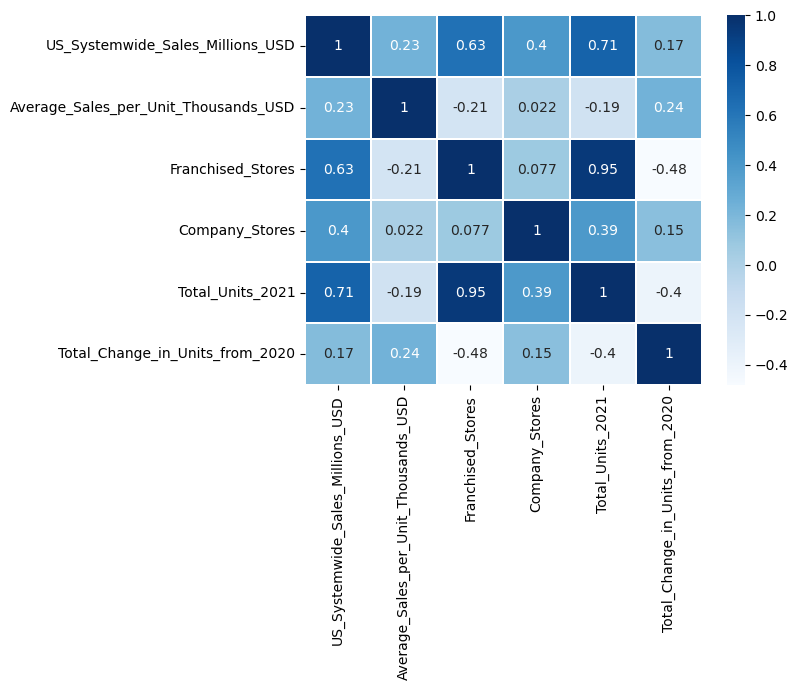

In [18]:
# Display the heatmap to get the relationships between data features
sns.heatmap(df.corr(numeric_only = True), annot=True , linewidths = 0.2, cmap = 'Blues')

In [19]:
#Duplicate Value Control
df.duplicated().sum() 

0

In [20]:
#Missing Value Control
df.isnull().sum() 

Fast_Food_Chains                        0
US_Systemwide_Sales_Millions_USD        0
Average_Sales_per_Unit_Thousands_USD    0
Franchised_Stores                       0
Company_Stores                          0
Total_Units_2021                        0
Total_Change_in_Units_from_2020         0
dtype: int64

In [21]:
df.columns

Index(['Fast_Food_Chains', 'US_Systemwide_Sales_Millions_USD',
       'Average_Sales_per_Unit_Thousands_USD', 'Franchised_Stores',
       'Company_Stores', 'Total_Units_2021',
       'Total_Change_in_Units_from_2020'],
      dtype='object')

In [22]:
df["Total_Change_in_Units_from_2020"].unique()

array([   40,   102,    15,    24,   -21,   -13,   155,   198,    55,
         -22,     4,   205,   161,     1,     9,     8,    32,   -32,
           5,   -23,   246,    48,    10,     6,   -28,   244,   150,
         -25,    30,   -53,   146,     2,    58,    38,    26,   113,
       -1043,   203,   125,    57,    29,    -6,   175,     3],
      dtype=int64)

In [23]:
df["Total_Change_in_Units_from_2020"].sort_values()

41   -1043
33     -53
18     -32
25     -28
31     -25
20     -23
10     -22
29     -22
4      -21
5      -13
34     -13
8      -13
47      -6
14       1
36       2
49       3
11       4
43       4
19       5
24       6
16       8
15       9
23      10
2       15
3       24
27      24
39      26
46      29
32      30
17      32
38      38
0       40
26      48
22      48
9       55
45      57
37      58
1      102
40     113
44     125
35     146
30     150
6      155
13     161
48     175
7      198
42     203
12     205
28     244
21     246
Name: Total_Change_in_Units_from_2020, dtype: int64

In [24]:
# According to the Total_Change_in_Units_from_2020 column, extract the status whether it has closed units or it has newly open ones

status = []

for value in df["Total_Change_in_Units_from_2020"]:
    if value >0:
        status.append(1)
    else:
        status.append(0)
        
df["Open_Closed_Status_2021"] = status
df.head() 

Fast_Food_Chains  US_Systemwide_Sales_Millions_USD  \
0           Arby’s                              4462   
1   Baskin-Robbins                               686   
2        Bojangles                              1485   
3      Burger King                             10033   
4       Carl’s Jr.                              1560   

   Average_Sales_per_Unit_Thousands_USD  Franchised_Stores  Company_Stores  \
0                                  1309               2293            1116   
1                                   296               2317               0   
2                                  1924                496             277   
3                                  1470               7054              51   
4                                  1400               1011              47   

   Total_Units_2021  Total_Change_in_Units_from_2020  Open_Closed_Status_2021  
0              3409                               40                        1  
1              2317                              102                        1  
2               773                               15                        1  
3              7105                               24                        1  
4              1058                              -21                        0

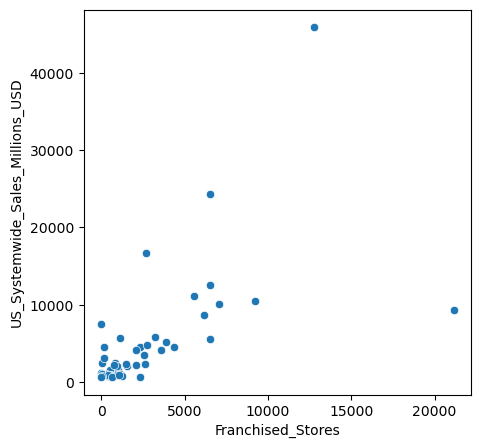

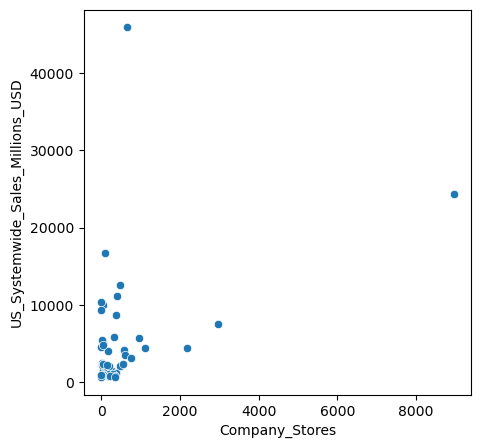

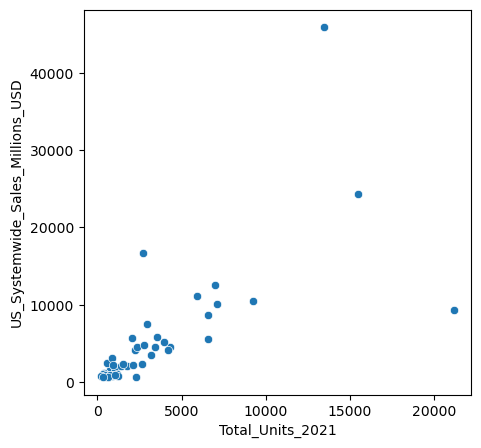

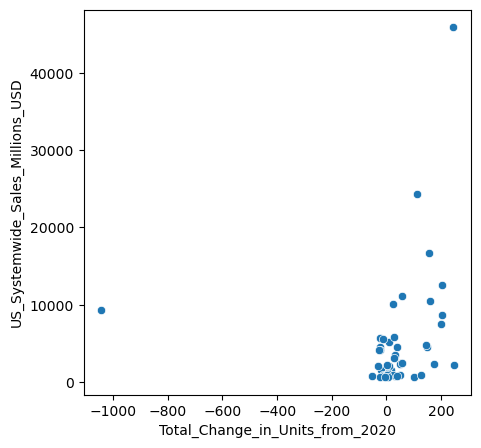

In [25]:
cols = ["Franchised_Stores", "Company_Stores", "Total_Units_2021", "Total_Change_in_Units_from_2020"]

for col in cols:
  plt.figure(figsize=(5,5))
  sns.scatterplot(x=col, y="US_Systemwide_Sales_Millions_USD", data=df)

plt.show()

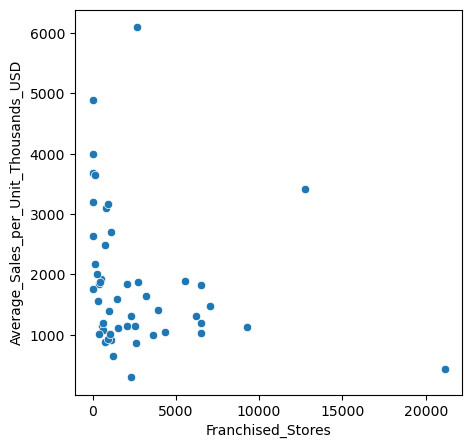

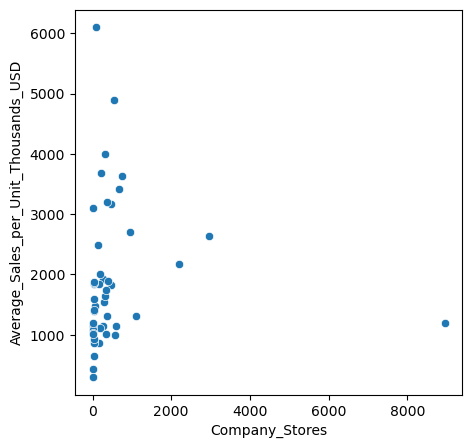

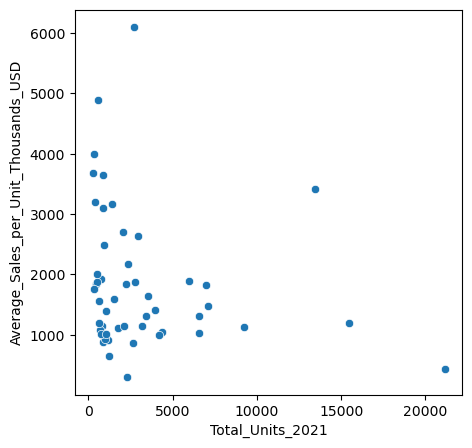

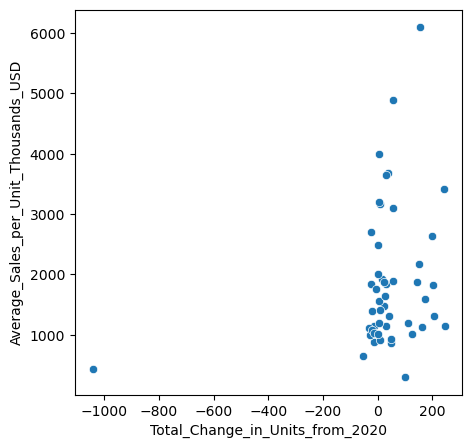

In [26]:
cols = ["Franchised_Stores", "Company_Stores", "Total_Units_2021" ,"Total_Change_in_Units_from_2020"]

for col in cols:
  plt.figure(figsize=(5,5))
  sns.scatterplot(x=col, y="Average_Sales_per_Unit_Thousands_USD", data=df)

plt.show()

In [27]:
df_closed=df_closed_in_2021=df[df["Open_Closed_Status_2021"]==0] # this is the closed unit counts in 2020

In [28]:
df_closed=df_closed.sort_values(["Total_Change_in_Units_from_2020"]) 

In [29]:
df_closed.shape

(13, 8)

In [30]:
df_closed.head()

Fast_Food_Chains  US_Systemwide_Sales_Millions_USD  \
41           Subway                              9350   
33    Papa Murphy’s                               809   
18         Hardee’s                              2100   
25   Little Caesars                              4185   
31     Panera Bread                              5650   

    Average_Sales_per_Unit_Thousands_USD  Franchised_Stores  Company_Stores  \
41                                   438              21147               0   
33                                   643               1213              27   
18                                  1117               1536             198   
25                                  1000               3601             580   
31                                  2700               1130             950   

    Total_Units_2021  Total_Change_in_Units_from_2020  Open_Closed_Status_2021  
41             21147                            -1043                        0  
33              1240                              -53                        0  
18              1734                              -32                        0  
25              4181                              -28                        0  
31              2080                              -25                        0

In [31]:
df_newly_open=df_open_in_2021=df[df["Open_Closed_Status_2021"]==1] # this is the newly opened unit counts in 2020

In [32]:
df_newly_open=df_newly_open.sort_values(["Total_Change_in_Units_from_2020"], ascending=False)

In [33]:
df_newly_open.shape

(37, 8)

In [34]:
df_newly_open.head()

Fast_Food_Chains  US_Systemwide_Sales_Millions_USD  \
21    Jersey Mike’s                              2203   
28       McDonald’s                             45960   
12         Domino's                              8641   
42        Taco Bell                             12600   
7          Chipotle                              7547   

    Average_Sales_per_Unit_Thousands_USD  Franchised_Stores  Company_Stores  \
21                                  1145               2087              13   
28                                  3420              12775             663   
12                                  1317               6185             375   
42                                  1823               6540             462   
7                                   2641                  0            2966   

    Total_Units_2021  Total_Change_in_Units_from_2020  Open_Closed_Status_2021  
21              2100                              246                        1  
28             13438                              244                        1  
12              6560                              205                        1  
42              7002                              203                        1  
7               2966                              198                        1

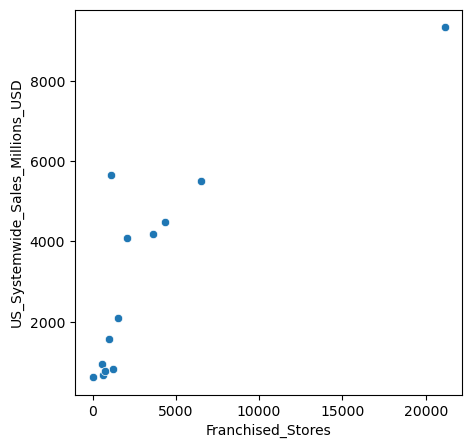

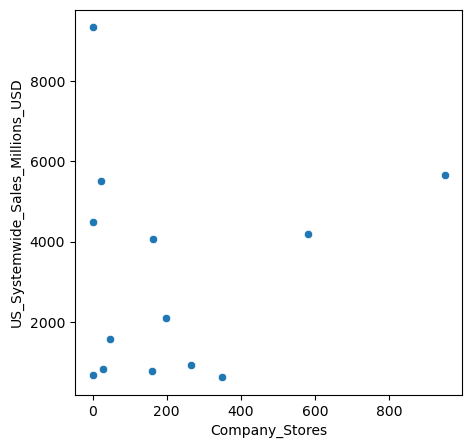

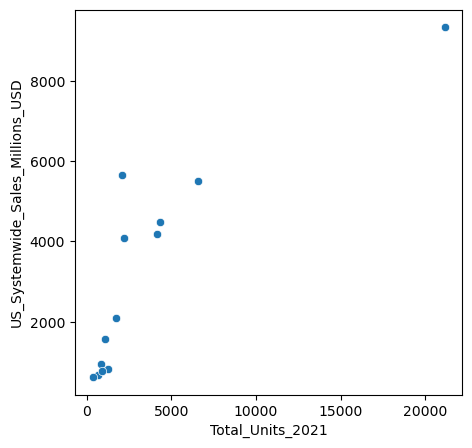

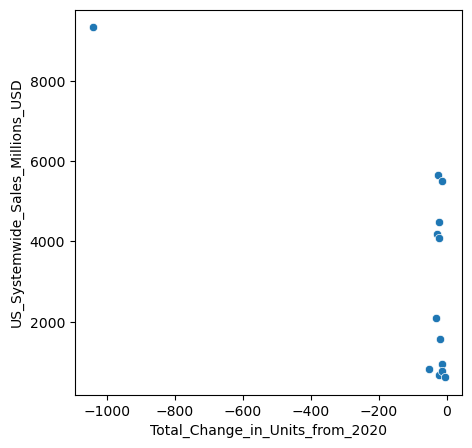

In [35]:
cols = ["Franchised_Stores", "Company_Stores", "Total_Units_2021", "Total_Change_in_Units_from_2020"]

for col in cols:
  plt.figure(figsize=(5,5))
  sns.scatterplot(x=col, y="US_Systemwide_Sales_Millions_USD", data=df_closed)

plt.show()

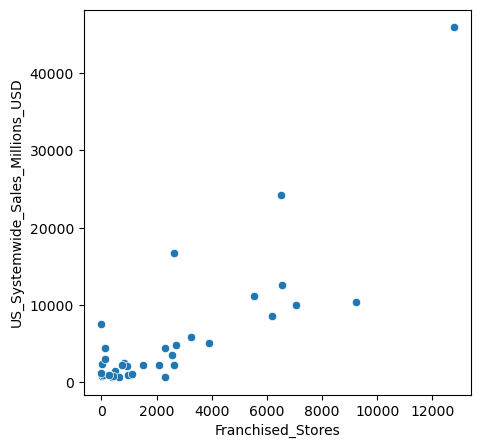

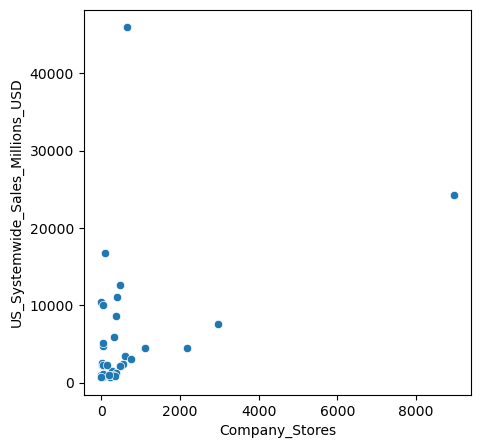

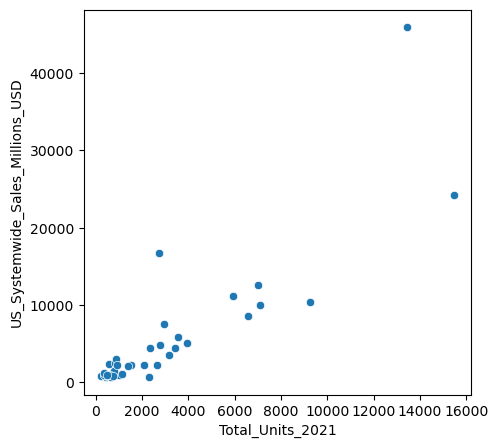

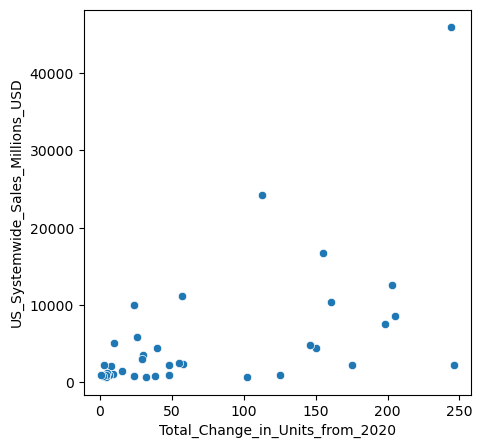

In [36]:
cols = ["Franchised_Stores", "Company_Stores", "Total_Units_2021" ,"Total_Change_in_Units_from_2020"]

for col in cols:
  plt.figure(figsize=(5,5))
  sns.scatterplot(x=col, y="US_Systemwide_Sales_Millions_USD", data=df_newly_open)

plt.show()

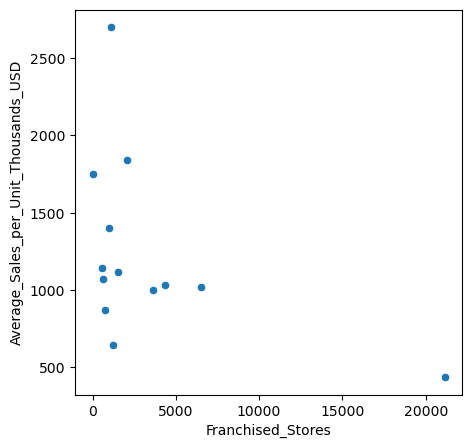

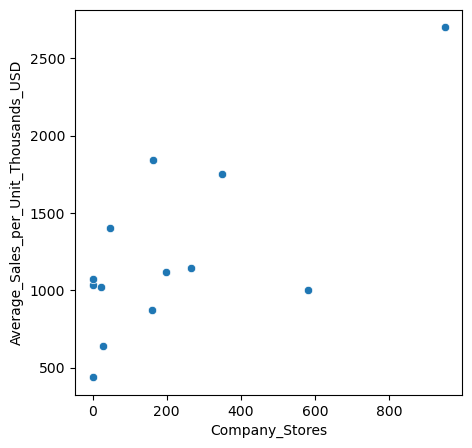

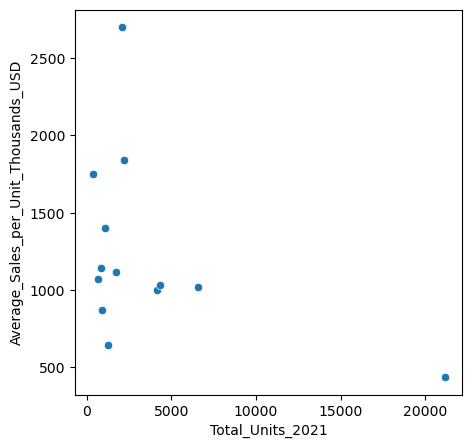

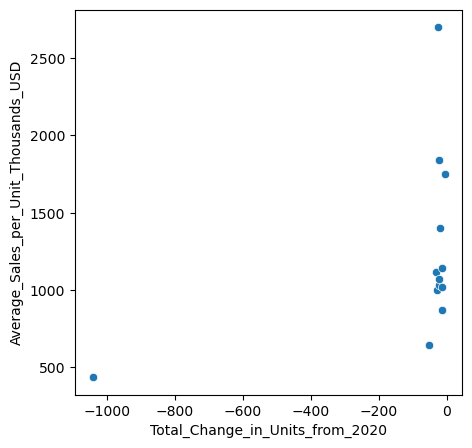

In [37]:
cols = ["Franchised_Stores", "Company_Stores", "Total_Units_2021" ,"Total_Change_in_Units_from_2020"]

for col in cols:
  plt.figure(figsize=(5,5))
  sns.scatterplot(x=col, y="Average_Sales_per_Unit_Thousands_USD", data=df_closed)

plt.show()

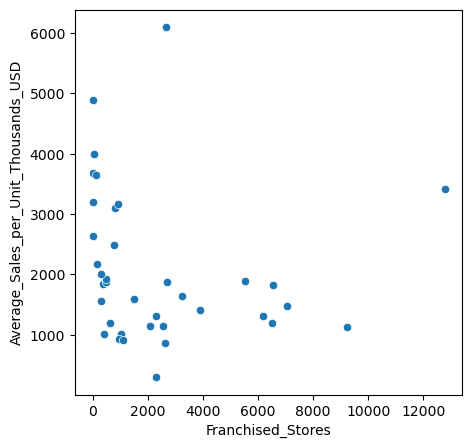

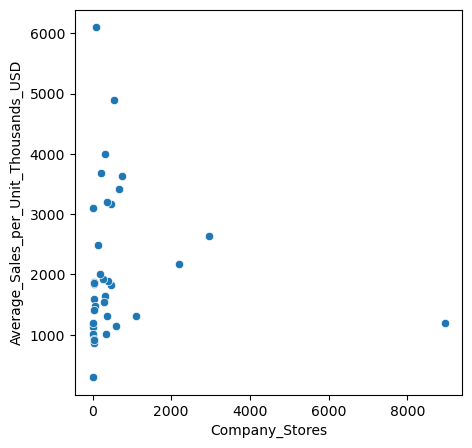

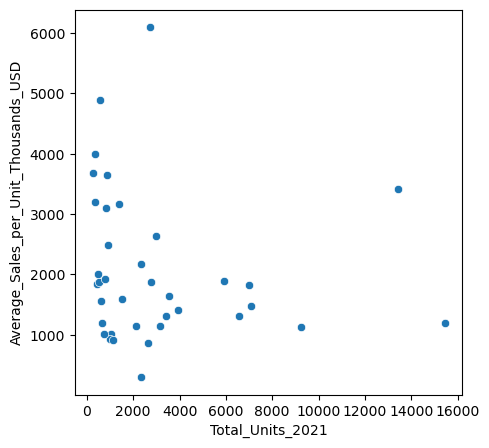

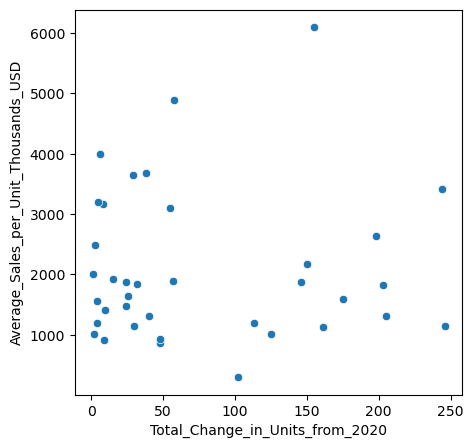

In [38]:
cols = ["Franchised_Stores", "Company_Stores", "Total_Units_2021" ,"Total_Change_in_Units_from_2020"]

for col in cols:
  plt.figure(figsize=(5,5))
  sns.scatterplot(x=col, y="Average_Sales_per_Unit_Thousands_USD", data=df_newly_open)

plt.show()

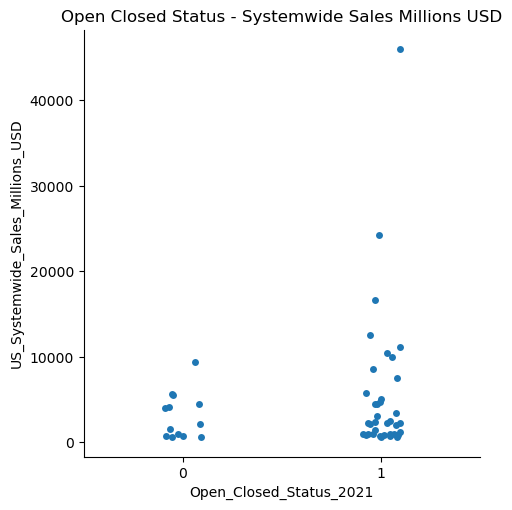

In [39]:
sns.catplot(x="Open_Closed_Status_2021", y="US_Systemwide_Sales_Millions_USD", data=df)
plt.title("Open Closed Status - Systemwide Sales Millions USD")
plt.show()

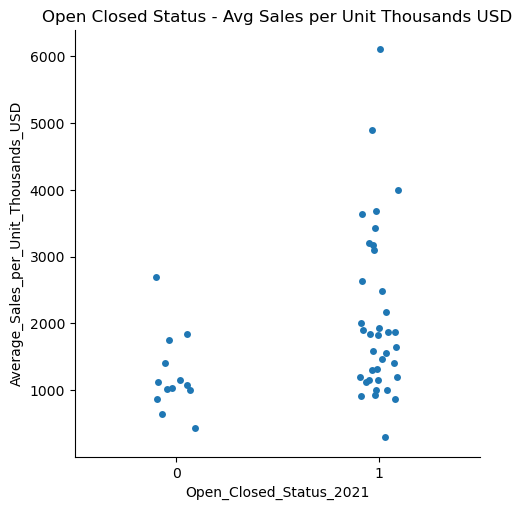

In [40]:
sns.catplot(x="Open_Closed_Status_2021", y="Average_Sales_per_Unit_Thousands_USD", data=df)
plt.title("Open Closed Status - Avg Sales per Unit Thousands USD")
plt.show()

<Axes: xlabel='US_Systemwide_Sales_Millions_USD', ylabel='Count'>

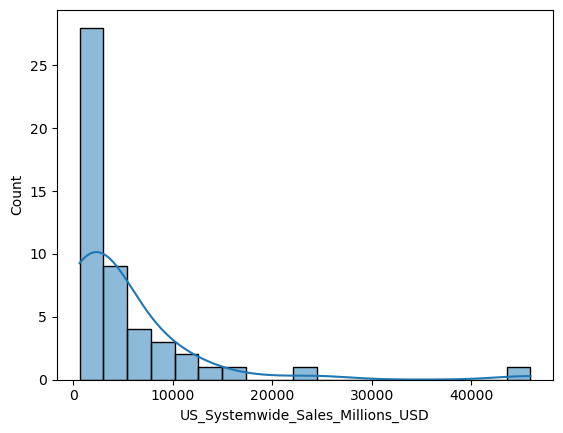

In [41]:
sns.histplot(df["US_Systemwide_Sales_Millions_USD"], kde=True)

<Axes: xlabel='US_Systemwide_Sales_Millions_USD', ylabel='Count'>

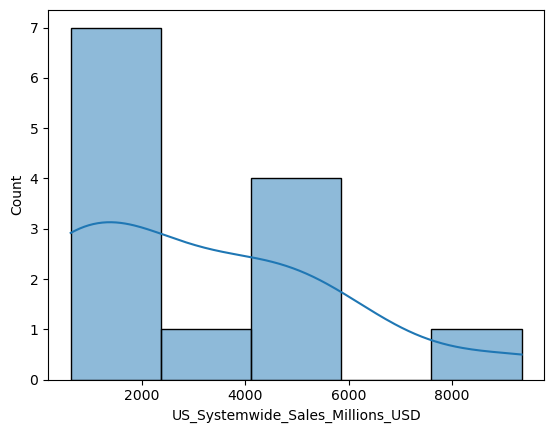

In [42]:
sns.histplot(df_closed["US_Systemwide_Sales_Millions_USD"], kde=True)

<Axes: xlabel='US_Systemwide_Sales_Millions_USD', ylabel='Count'>

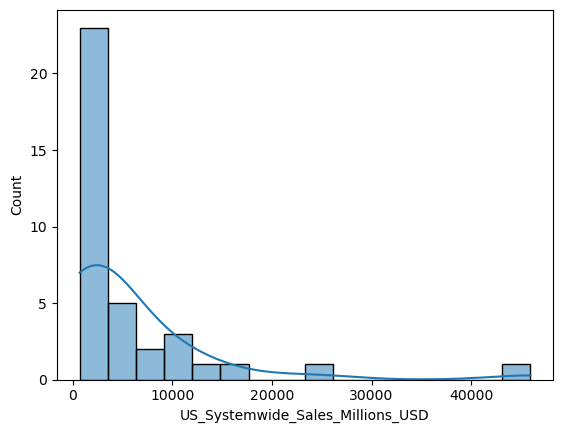

In [43]:
sns.histplot(df_newly_open["US_Systemwide_Sales_Millions_USD"], kde=True)

<Axes: xlabel='Average_Sales_per_Unit_Thousands_USD', ylabel='Count'>

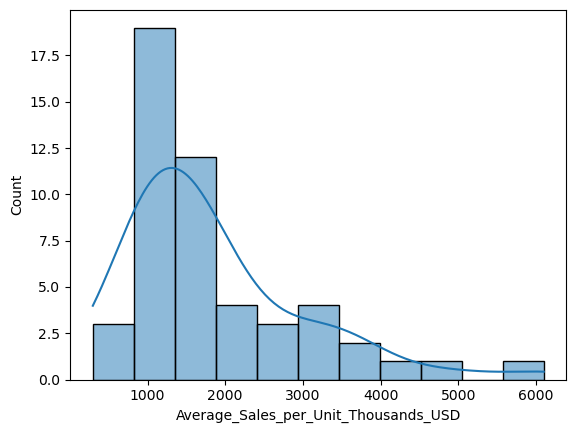

In [44]:
sns.histplot(df["Average_Sales_per_Unit_Thousands_USD"], kde=True)

<Axes: xlabel='Average_Sales_per_Unit_Thousands_USD', ylabel='Count'>

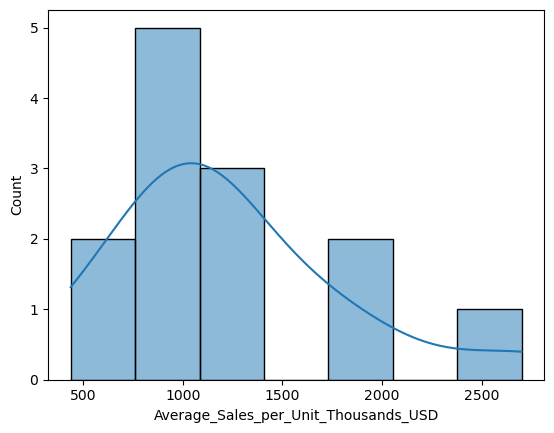

In [45]:
sns.histplot(df_closed["Average_Sales_per_Unit_Thousands_USD"], kde=True)

<Axes: xlabel='Average_Sales_per_Unit_Thousands_USD', ylabel='Count'>

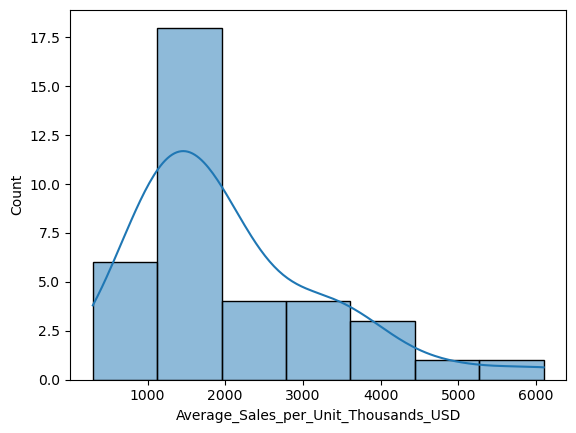

In [46]:
sns.histplot(df_newly_open["Average_Sales_per_Unit_Thousands_USD"], kde=True)

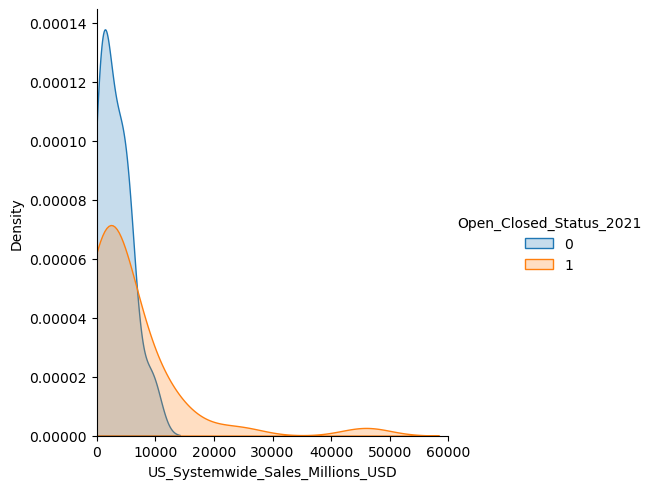

In [47]:
(sns.FacetGrid(df, hue="Open_Closed_Status_2021", height=5, xlim=(0, 60000)).map(sns.kdeplot, "US_Systemwide_Sales_Millions_USD", fill=True).add_legend())

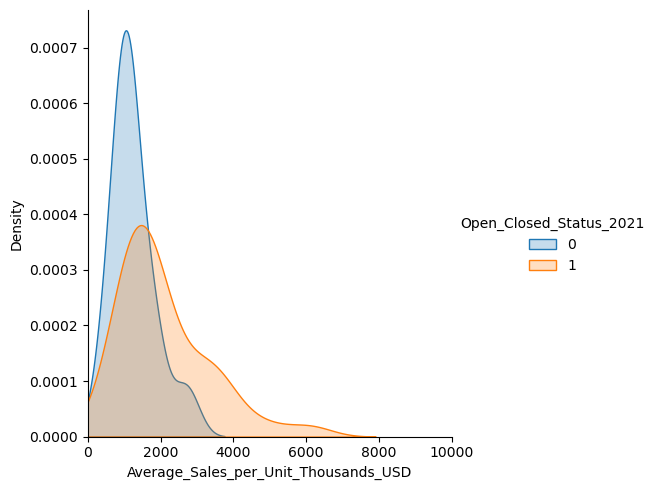

In [48]:
(sns.FacetGrid(df, hue="Open_Closed_Status_2021", height=5, xlim=(0, 10000)).map(sns.kdeplot, "Average_Sales_per_Unit_Thousands_USD", fill=True).add_legend())

In [49]:
df.columns

Index(['Fast_Food_Chains', 'US_Systemwide_Sales_Millions_USD',
       'Average_Sales_per_Unit_Thousands_USD', 'Franchised_Stores',
       'Company_Stores', 'Total_Units_2021', 'Total_Change_in_Units_from_2020',
       'Open_Closed_Status_2021'],
      dtype='object')

In [50]:
df.describe().T

count     mean          std     min  \
US_Systemwide_Sales_Millions_USD       50.0  4965.06  7531.439444   615.0   
Average_Sales_per_Unit_Thousands_USD   50.0  1857.66  1163.266418   296.0   
Franchised_Stores                      50.0  2663.96  3801.497540     0.0   
Company_Stores                         50.0   503.50  1332.169280     0.0   
Total_Units_2021                       50.0  3167.40  4124.173105   243.0   
Total_Change_in_Units_from_2020        50.0    29.70   173.769875 -1043.0   
Open_Closed_Status_2021                50.0     0.74     0.443087     0.0   

                                          25%     50%      75%      max  
US_Systemwide_Sales_Millions_USD       935.25  2289.5  5400.00  45960.0  
Average_Sales_per_Unit_Thousands_USD  1084.00  1510.5  2129.75   6100.0  
Franchised_Stores                      478.00  1115.5  3103.00  21147.0  
Company_Stores                          33.75   176.0   396.00   8953.0  
Total_Units_2021                       788.25  1634.0  3516.25  21147.0  
Total_Change_in_Units_from_2020         -4.25    24.0    91.00    246.0  
Open_Closed_Status_2021                  0.25     1.0     1.00      1.0

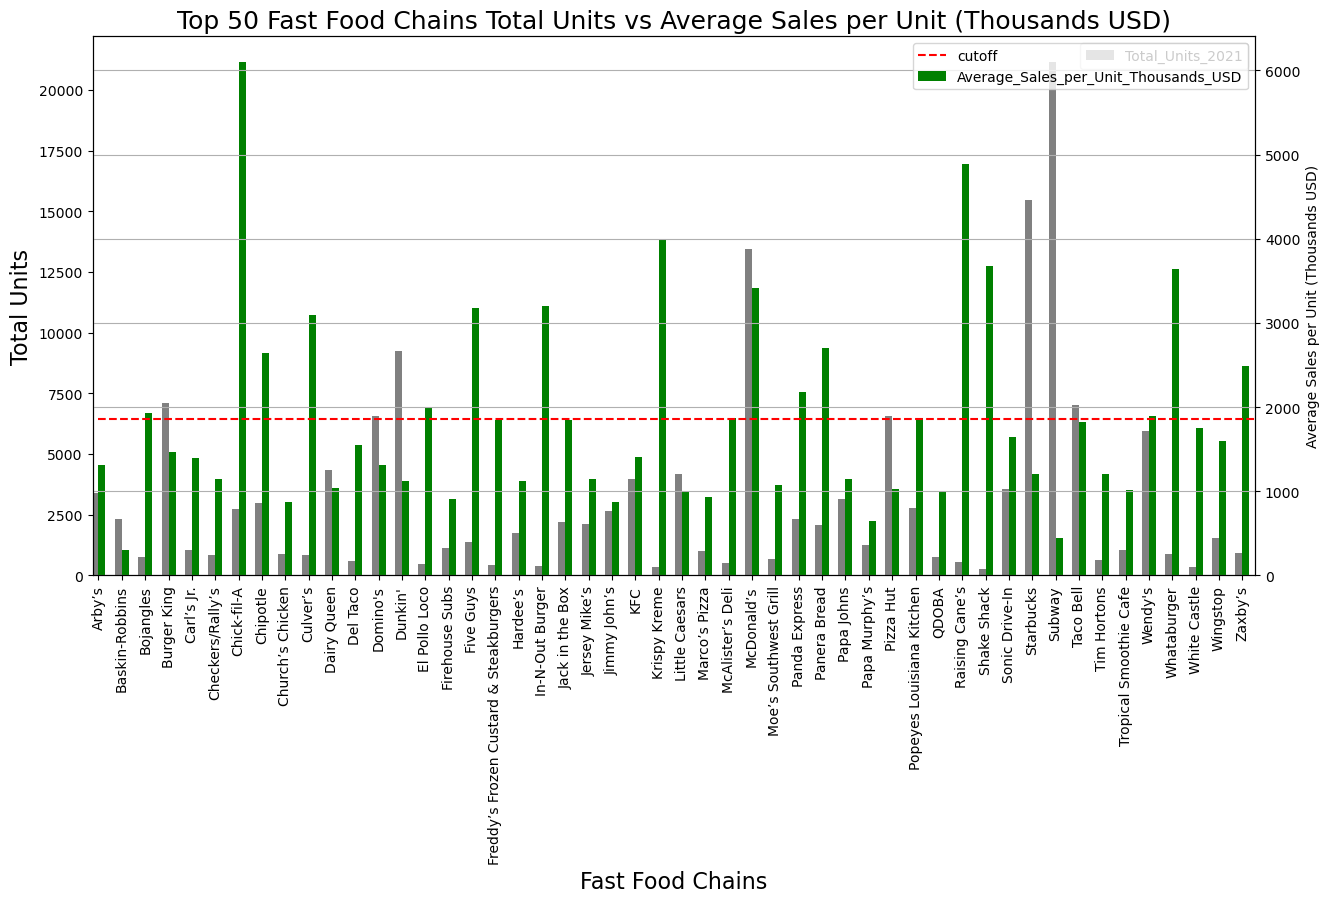

In [51]:
df_ffc = df.set_index('Fast_Food_Chains')

fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .3

df_ffc.Total_Units_2021.plot(kind='bar',color='grey',ax=ax, width=width, position=1)
df_ffc.Average_Sales_per_Unit_Thousands_USD.plot(kind='bar',color='green', ax=ax2, width=width, position=0)

plt.hlines(y=1857.66, xmin=0, xmax=6500, colors='r', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)

ax.set_title('Top 50 Fast Food Chains Total Units vs Average Sales per Unit (Thousands USD)', fontsize=18)
ax.set_ylabel('Total Units', fontsize=16)
ax2.set_ylabel('Average Sales per Unit (Thousands USD)')
ax.set_xlabel('Fast Food Chains', fontsize=16)

ax.legend()
ax2.legend()

plt.show()

In [52]:
df_ffc1=df.sort_values(["Total_Units_2021"], ascending=False)
df_ffc1.head()

Fast_Food_Chains  US_Systemwide_Sales_Millions_USD  \
41           Subway                              9350   
40        Starbucks                             24300   
28       McDonald’s                             45960   
13          Dunkin'                             10416   
3       Burger King                             10033   

    Average_Sales_per_Unit_Thousands_USD  Franchised_Stores  Company_Stores  \
41                                   438              21147               0   
40                                  1200               6497            8953   
28                                  3420              12775             663   
13                                  1127               9244               0   
3                                   1470               7054              51   

    Total_Units_2021  Total_Change_in_Units_from_2020  Open_Closed_Status_2021  
41             21147                            -1043                        0  
40             15450                              113                        1  
28             13438                              244                        1  
13              9244                              161                        1  
3               7105                               24                        1

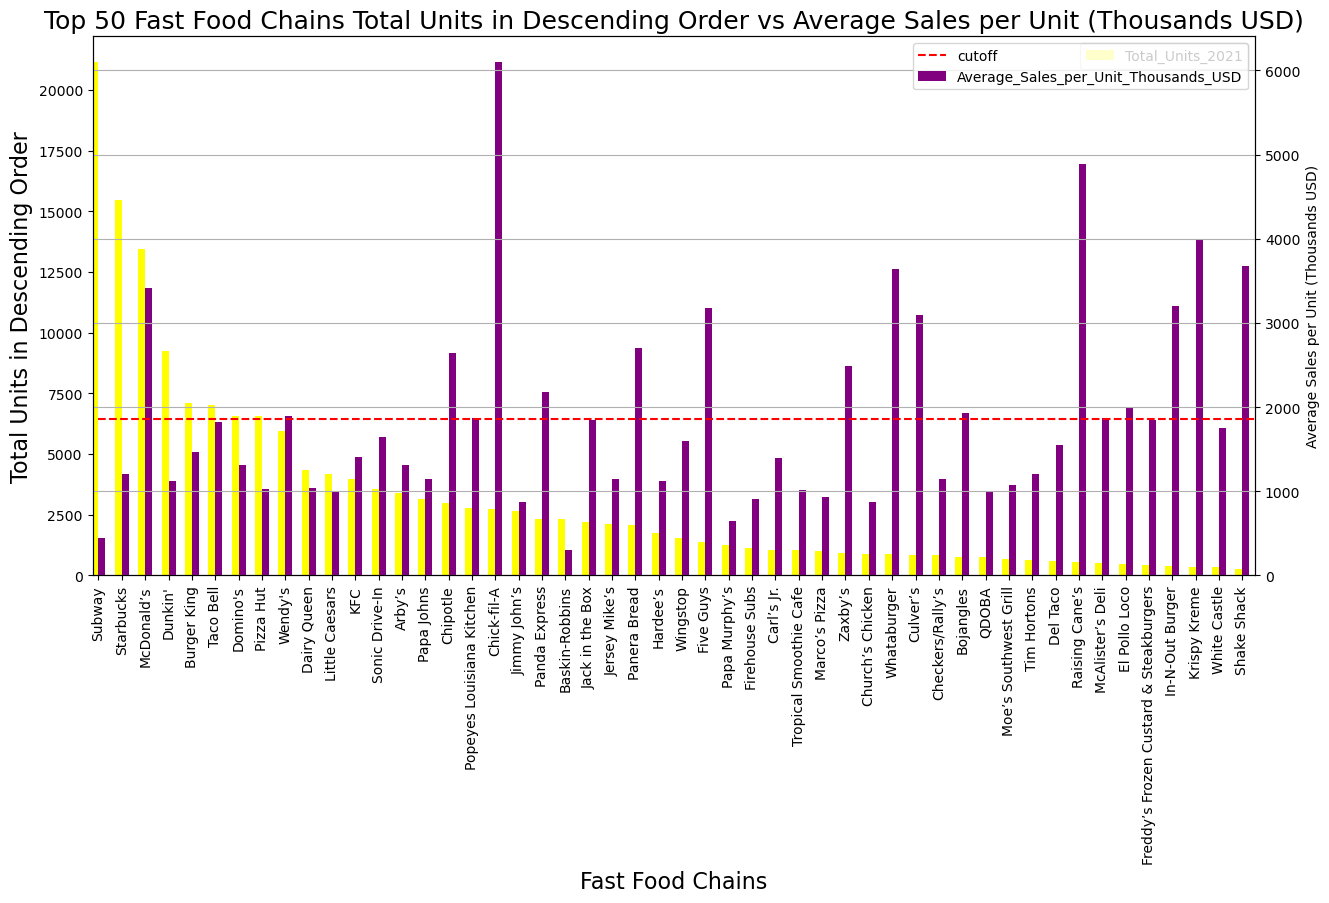

In [53]:
df_ffc1 = df_ffc1.set_index('Fast_Food_Chains')

fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .3

df_ffc1.Total_Units_2021.plot(kind='bar',color='yellow',ax=ax, width=width, position=1)
df_ffc1.Average_Sales_per_Unit_Thousands_USD.plot(kind='bar',color='purple', ax=ax2, width=width, position=0)

plt.hlines(y=1857.66, xmin=0, xmax=6500, colors='r', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)


ax.set_title('Top 50 Fast Food Chains Total Units in Descending Order vs Average Sales per Unit (Thousands USD)', fontsize=18)
ax.set_ylabel('Total Units in Descending Order', fontsize=16)
ax2.set_ylabel('Average Sales per Unit (Thousands USD)')
ax.set_xlabel('Fast Food Chains', fontsize=16)

ax.legend()
ax2.legend()

plt.show()

In [54]:
df_ffc2=df.sort_values(["Average_Sales_per_Unit_Thousands_USD"], ascending=False)
df_ffc2.head()

Fast_Food_Chains  US_Systemwide_Sales_Millions_USD  \
6       Chick-fil-A                             16700   
37   Raising Cane’s                              2377   
24     Krispy Kreme                               996   
38      Shake Shack                               777   
46      Whataburger                              3089   

    Average_Sales_per_Unit_Thousands_USD  Franchised_Stores  Company_Stores  \
6                                   6100               2650              82   
37                                  4893                 23             544   
24                                  4000                 51             307   
38                                  3679                 25             218   
46                                  3640                131             742   

    Total_Units_2021  Total_Change_in_Units_from_2020  Open_Closed_Status_2021  
6               2732                              155                        1  
37               567                               58                        1  
24               358                                6                        1  
38               243                               38                        1  
46               873                               29                        1

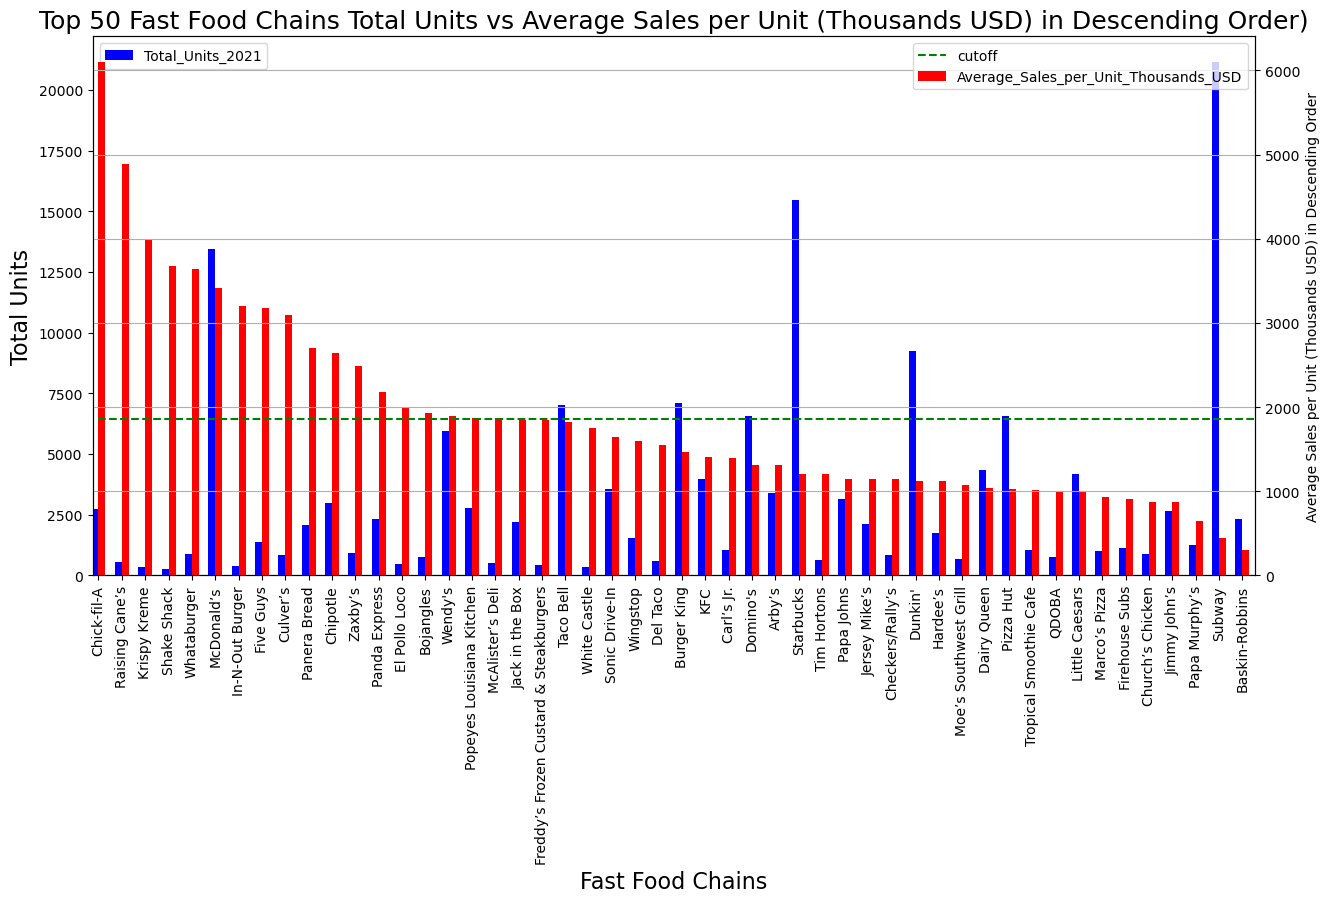

In [55]:
df_ffc2 = df_ffc2.set_index('Fast_Food_Chains')

fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .3

df_ffc2.Total_Units_2021.plot(kind='bar',color='blue',ax=ax, width=width, position=1)
df_ffc2.Average_Sales_per_Unit_Thousands_USD.plot(kind='bar',color='red', ax=ax2, width=width, position=0)

plt.hlines(y=1857.66, xmin=0, xmax=6500, colors='g', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)

ax.set_title('Top 50 Fast Food Chains Total Units vs Average Sales per Unit (Thousands USD) in Descending Order)', fontsize=18)
ax.set_ylabel('Total Units', fontsize=16)
ax2.set_ylabel('Average Sales per Unit (Thousands USD) in Descending Order')
ax.set_xlabel('Fast Food Chains', fontsize=16)
ax.legend()
ax2.legend()

plt.show()

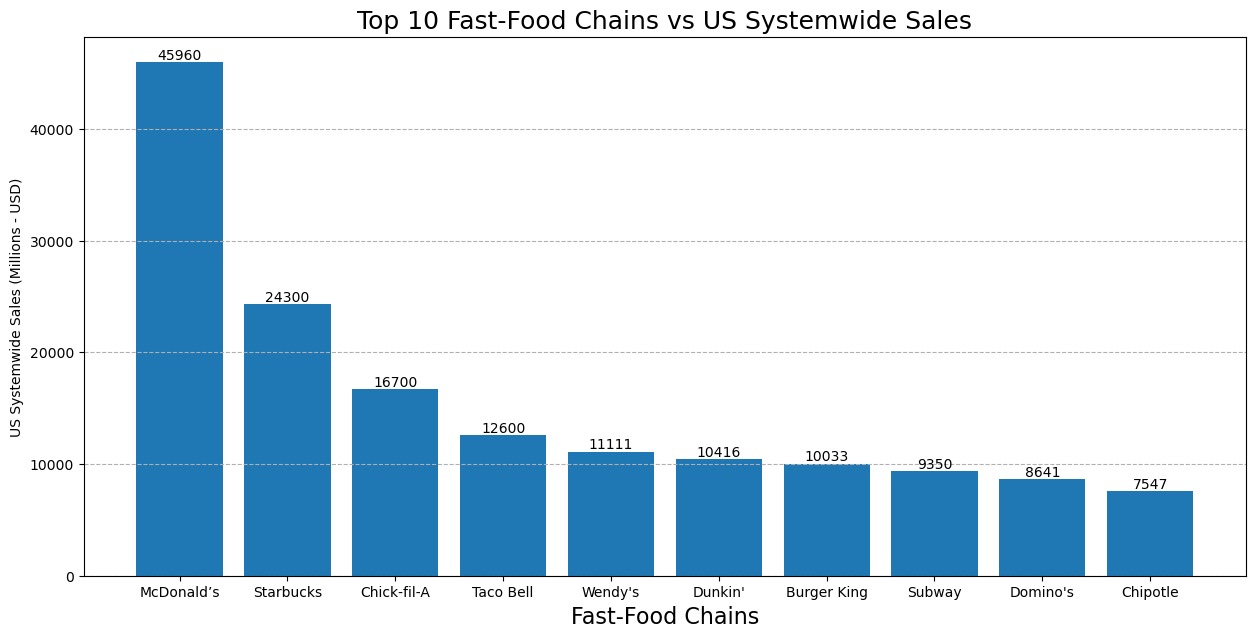

In [56]:
# Sort the DataFrame by U.S. Systemwide Sales (Millions - U.S Dollars) in descending order
df_sort_sys_USD=df.sort_values(["US_Systemwide_Sales_Millions_USD"], ascending=False)

# Select the top 10 chains
top_10_df_sort_sys_USD = df_sort_sys_USD.head(10)

# Create a bar chart
fig = plt.figure(figsize=(15,7))
ax = fig.subplots()
ax.bar(top_10_df_sort_sys_USD['Fast_Food_Chains'], top_10_df_sort_sys_USD['US_Systemwide_Sales_Millions_USD'])

# Add labels and title
ax.set_xlabel('Fast-Food Chains', fontsize=16)
ax.set_ylabel('US Systemwide Sales (Millions - USD)')
ax.set_title('Top 10 Fast-Food Chains vs US Systemwide Sales', fontsize=18)

# Add grid lines
ax.grid(axis='y', linestyle='--')

# Add value labels to the top of each bar
for i, v in enumerate(top_10_df_sort_sys_USD['US_Systemwide_Sales_Millions_USD']):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

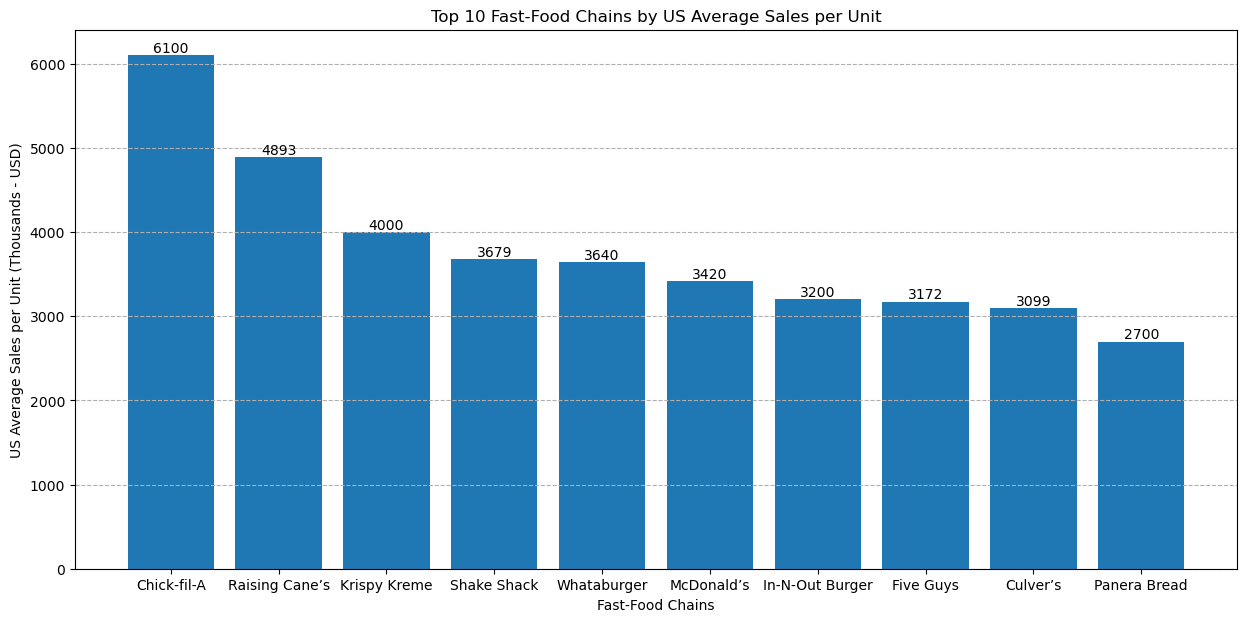

In [57]:
# Sort the DataFrame by Average_Sales_per_Unit_Thousands_USD in descending order
df_sort_avg_per_unit_USD=df.sort_values(["Average_Sales_per_Unit_Thousands_USD"], ascending=False)

# Select the top 10 chains
top_10_df_sort_avg_per_unit_USD = df_sort_avg_per_unit_USD.head(10)

# Create a bar chart
fig = plt.figure(figsize=(15,7))
ax = fig.subplots()
ax.bar(top_10_df_sort_avg_per_unit_USD['Fast_Food_Chains'], top_10_df_sort_avg_per_unit_USD['Average_Sales_per_Unit_Thousands_USD'])

# Add labels and title
ax.set_xlabel('Fast-Food Chains')
ax.set_ylabel('US Average Sales per Unit (Thousands - USD)')
ax.set_title('Top 10 Fast-Food Chains by US Average Sales per Unit')

# Add grid lines
ax.grid(axis='y', linestyle='--')

# Add value labels to the top of each bar
for i, v in enumerate(top_10_df_sort_avg_per_unit_USD['Average_Sales_per_Unit_Thousands_USD']):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

In [58]:
df1=df.sort_values(by=['Franchised_Stores'], ascending=False)

In [59]:
df1.head()

Fast_Food_Chains  US_Systemwide_Sales_Millions_USD  \
41           Subway                              9350   
28       McDonald’s                             45960   
13          Dunkin'                             10416   
3       Burger King                             10033   
42        Taco Bell                             12600   

    Average_Sales_per_Unit_Thousands_USD  Franchised_Stores  Company_Stores  \
41                                   438              21147               0   
28                                  3420              12775             663   
13                                  1127               9244               0   
3                                   1470               7054              51   
42                                  1823               6540             462   

    Total_Units_2021  Total_Change_in_Units_from_2020  Open_Closed_Status_2021  
41             21147                            -1043                        0  
28             13438                              244                        1  
13              9244                              161                        1  
3               7105                               24                        1  
42              7002                              203                        1

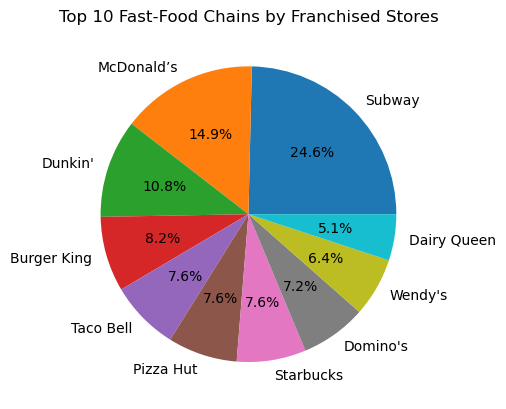

In [60]:
# Sort df by Franchised Store and Select the top 10 chains
top_10_df_sort_Franch = df1.sort_values('Franchised_Stores', ascending=False).head(10)

# Create a pie chart
plt.pie(top_10_df_sort_Franch['Franchised_Stores'], labels=top_10_df_sort_Franch['Fast_Food_Chains'], autopct='%1.1f%%')

plt.title('Top 10 Fast-Food Chains by Franchised Stores')
plt.show()


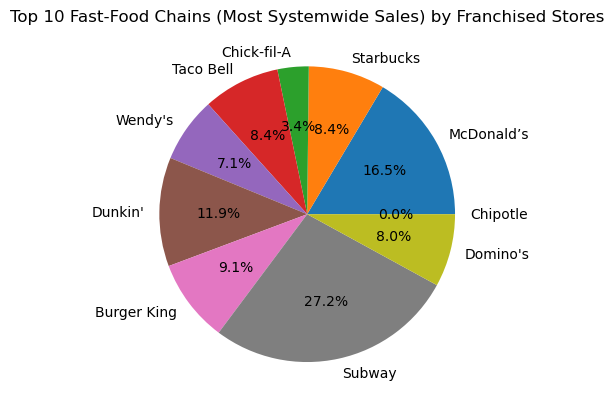

In [61]:
plt.pie(top_10_df_sort_sys_USD['Franchised_Stores'], labels=top_10_df_sort_sys_USD['Fast_Food_Chains'], autopct='%1.1f%%')

plt.title('Top 10 Fast-Food Chains (Most Systemwide Sales) by Franchised Stores')
plt.show()

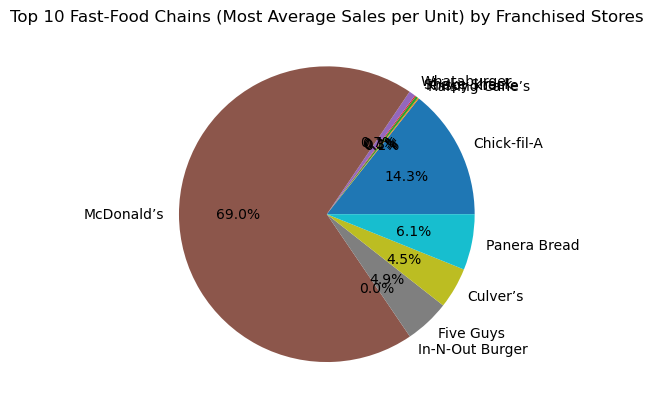

In [62]:
plt.pie(top_10_df_sort_avg_per_unit_USD['Franchised_Stores'], labels=top_10_df_sort_avg_per_unit_USD['Fast_Food_Chains'], autopct='%1.1f%%')

plt.title('Top 10 Fast-Food Chains (Most Average Sales per Unit) by Franchised Stores')
plt.show()

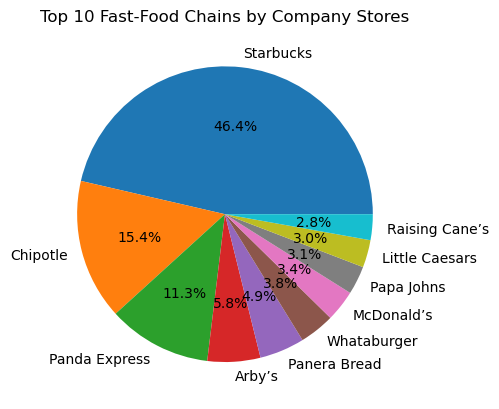

In [63]:
# Sort df by Company Store and Select the top 10 chains
top_10_df_sort_Company = df.sort_values('Company_Stores', ascending=False).head(10)

# Create a pie chart
plt.pie(top_10_df_sort_Company['Company_Stores'], labels=top_10_df_sort_Company['Fast_Food_Chains'], autopct='%1.1f%%')

plt.title('Top 10 Fast-Food Chains by Company Stores')
plt.show()

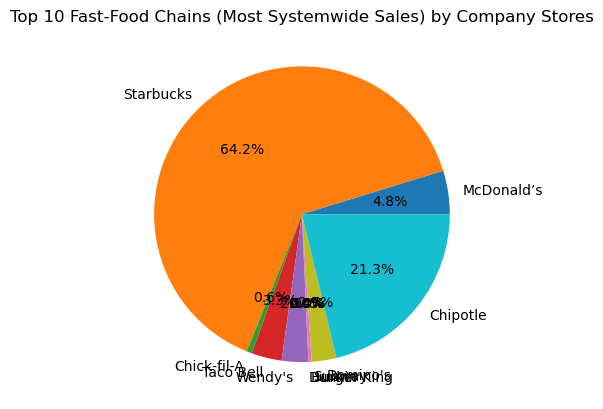

In [64]:
plt.pie(top_10_df_sort_sys_USD['Company_Stores'], labels=top_10_df_sort_sys_USD['Fast_Food_Chains'], autopct='%1.1f%%')

plt.title('Top 10 Fast-Food Chains (Most Systemwide Sales) by Company Stores')
plt.show()

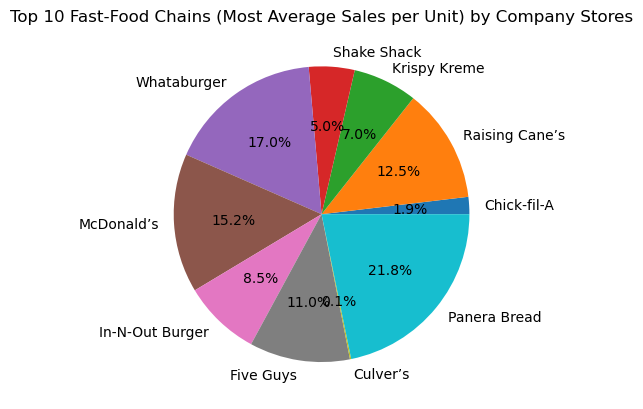

In [65]:
plt.pie(top_10_df_sort_avg_per_unit_USD['Company_Stores'], labels=top_10_df_sort_avg_per_unit_USD['Fast_Food_Chains'], autopct='%1.1f%%')

plt.title('Top 10 Fast-Food Chains (Most Average Sales per Unit) by Company Stores')
plt.show()

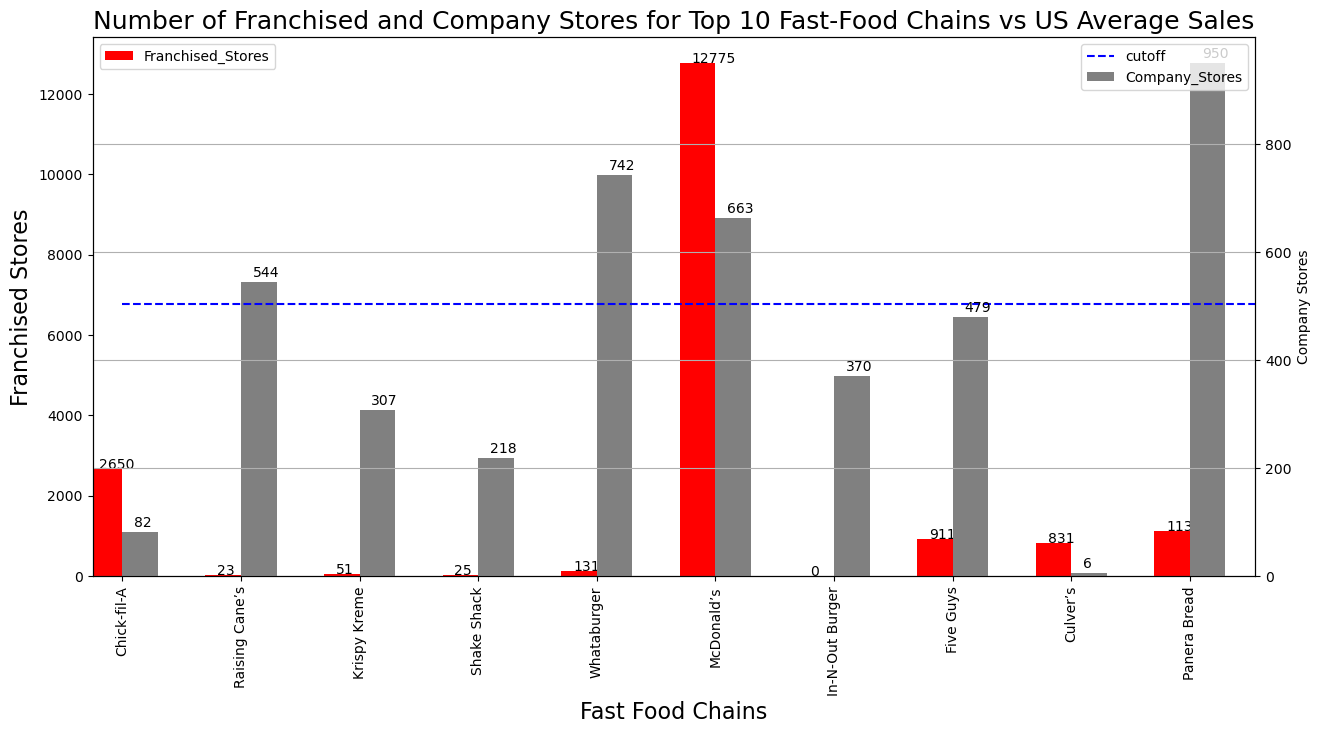

In [66]:
df_ffc2=df.sort_values(["Average_Sales_per_Unit_Thousands_USD"], ascending=False).head(10)
df_ffc3 = df_ffc2.set_index('Fast_Food_Chains')

fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .3

df_ffc3.Franchised_Stores.plot(kind='bar',color='red',ax=ax, width=width, position=1)
df_ffc3.Company_Stores.plot(kind='bar',color='grey', ax=ax2, width=width, position=0)

plt.hlines(y=503.5, xmin=0, xmax=550, colors='b', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.1, p.get_height() + 10))
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x() + 0.1, p.get_height() + 10))
    
ax.legend(loc=2)
ax2.legend(loc=1)
ax.set_title('Number of Franchised and Company Stores for Top 10 Fast-Food Chains vs US Average Sales', fontsize=18)
ax.set_ylabel('Franchised Stores', fontsize=16)
ax2.set_ylabel('Company Stores')
ax.set_xlabel('Fast Food Chains', fontsize=16)

plt.show()

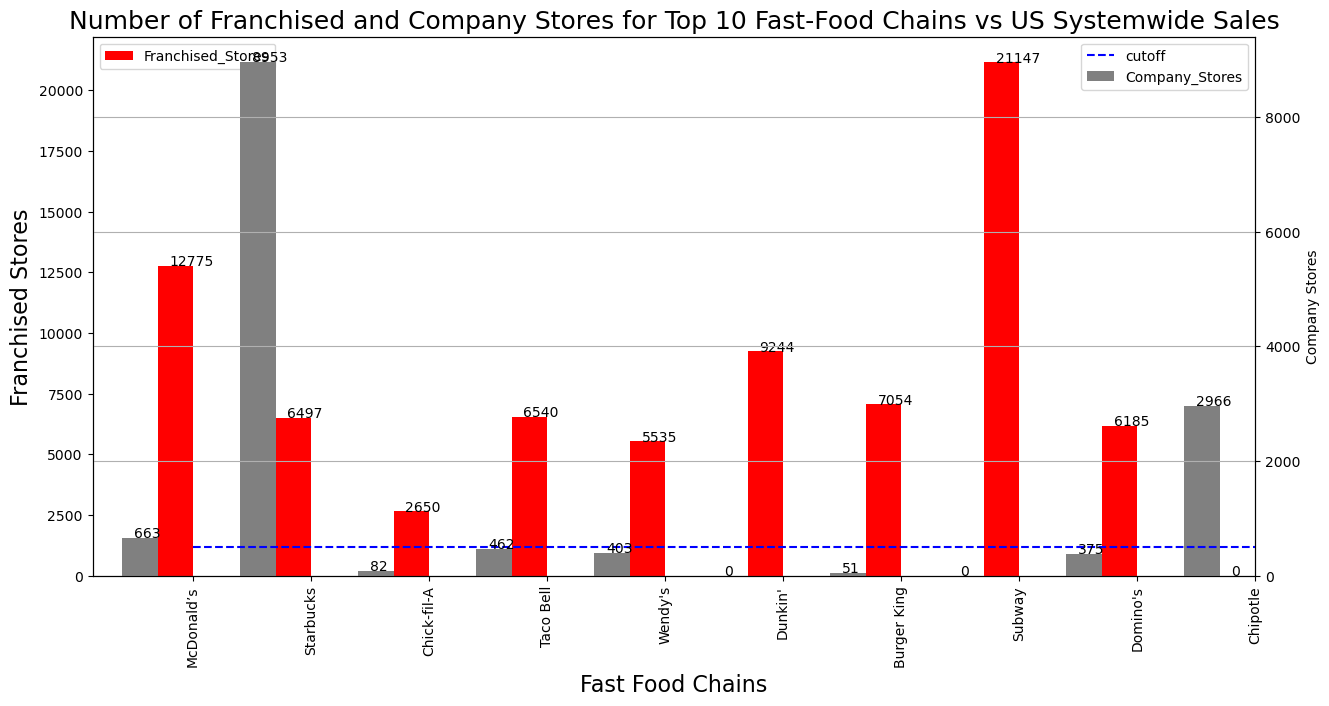

In [67]:
df_ffc4=df.sort_values(["US_Systemwide_Sales_Millions_USD"], ascending=False).head(10)
df_ffc5 = df_ffc4.set_index('Fast_Food_Chains')

fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .3

df_ffc5.Franchised_Stores.plot(kind='bar',color='red',ax=ax, width=width, position=1)
df_ffc5.Company_Stores.plot(kind='bar',color='grey', ax=ax2, width=width, position=2)

plt.hlines(y=503.5, xmin=0, xmax=550, colors='b', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.1, p.get_height() + 10))
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x() + 0.1, p.get_height() + 10))
    
ax.legend(loc=2)
ax2.legend(loc=1)
ax.set_title('Number of Franchised and Company Stores for Top 10 Fast-Food Chains vs US Systemwide Sales', fontsize=18)
ax.set_ylabel('Franchised Stores', fontsize=16)
ax2.set_ylabel('Company Stores')
ax.set_xlabel('Fast Food Chains', fontsize=16)

plt.show()

In [68]:
df.describe().T

count     mean          std     min  \
US_Systemwide_Sales_Millions_USD       50.0  4965.06  7531.439444   615.0   
Average_Sales_per_Unit_Thousands_USD   50.0  1857.66  1163.266418   296.0   
Franchised_Stores                      50.0  2663.96  3801.497540     0.0   
Company_Stores                         50.0   503.50  1332.169280     0.0   
Total_Units_2021                       50.0  3167.40  4124.173105   243.0   
Total_Change_in_Units_from_2020        50.0    29.70   173.769875 -1043.0   
Open_Closed_Status_2021                50.0     0.74     0.443087     0.0   

                                          25%     50%      75%      max  
US_Systemwide_Sales_Millions_USD       935.25  2289.5  5400.00  45960.0  
Average_Sales_per_Unit_Thousands_USD  1084.00  1510.5  2129.75   6100.0  
Franchised_Stores                      478.00  1115.5  3103.00  21147.0  
Company_Stores                          33.75   176.0   396.00   8953.0  
Total_Units_2021                       788.25  1634.0  3516.25  21147.0  
Total_Change_in_Units_from_2020         -4.25    24.0    91.00    246.0  
Open_Closed_Status_2021                  0.25     1.0     1.00      1.0

In [69]:
df_2=df.sort_values(["US_Systemwide_Sales_Millions_USD"], ascending=False).head(5)
df_2

Fast_Food_Chains  US_Systemwide_Sales_Millions_USD  \
28       McDonald’s                             45960   
40        Starbucks                             24300   
6       Chick-fil-A                             16700   
42        Taco Bell                             12600   
45          Wendy's                             11111   

    Average_Sales_per_Unit_Thousands_USD  Franchised_Stores  Company_Stores  \
28                                  3420              12775             663   
40                                  1200               6497            8953   
6                                   6100               2650              82   
42                                  1823               6540             462   
45                                  1895               5535             403   

    Total_Units_2021  Total_Change_in_Units_from_2020  Open_Closed_Status_2021  
28             13438                              244                        1  
40             15450                              113                        1  
6               2732                              155                        1  
42              7002                              203                        1  
45              5938                               57                        1

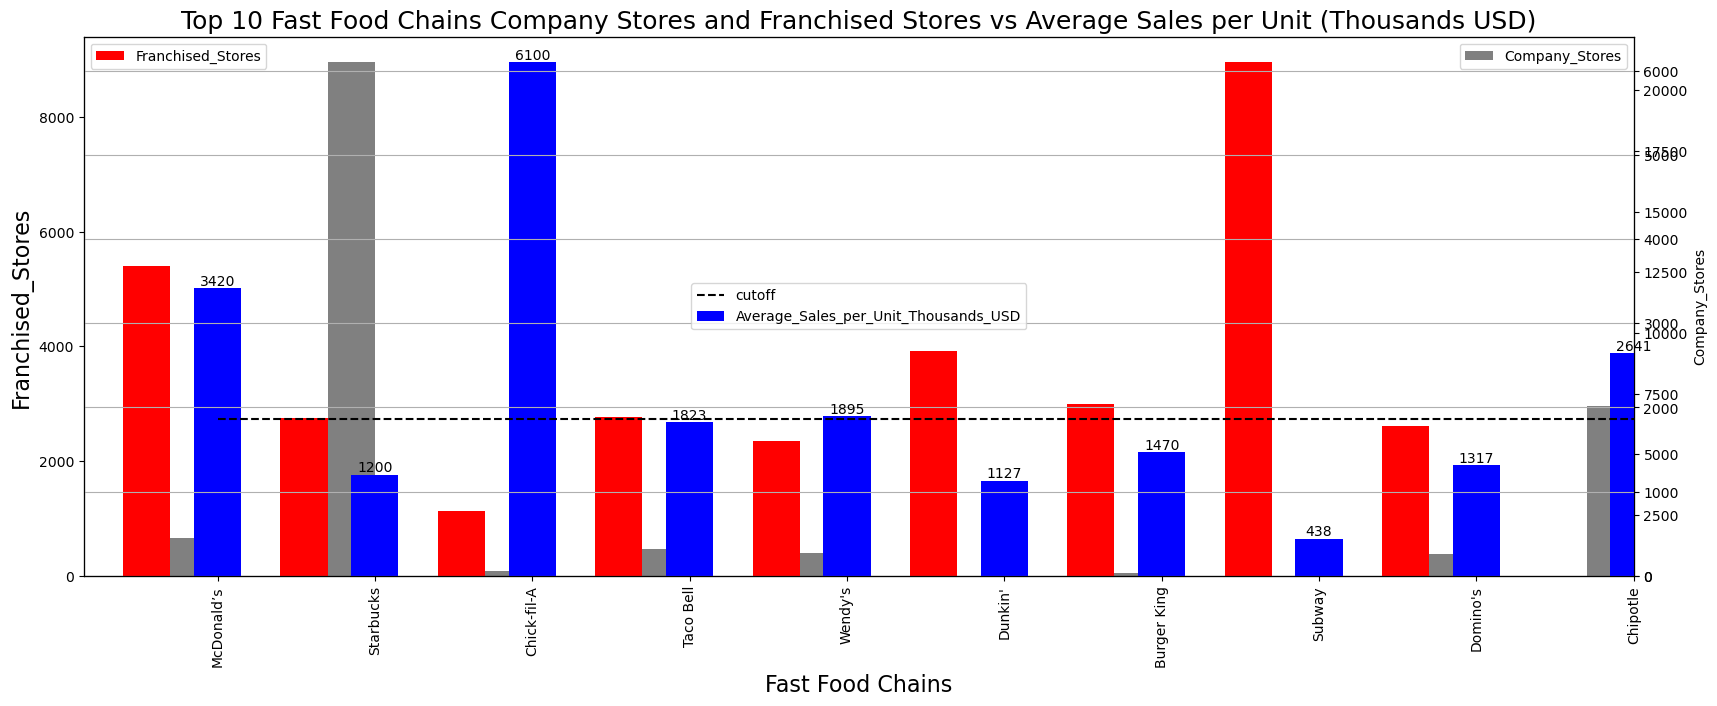

In [70]:
df_2=df.sort_values(["US_Systemwide_Sales_Millions_USD"], ascending=False).head(10)
df_3 = df_2.set_index('Fast_Food_Chains')

fig = plt.figure(figsize=(20,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() 
ax3 = ax.twinx() 
# Create another axes that shares the same x-axis as a
width = .3

df_3.Company_Stores.plot(kind='bar',color='grey',ax=ax, width=width, position=1)
df_3.Average_Sales_per_Unit_Thousands_USD.plot(kind='bar',color='blue', ax=ax3, width=width)
df_3.Franchised_Stores.plot(kind='bar',color='red',ax=ax2, width=width, position=2)

plt.hlines(y=1857.66, xmin=0, xmax=10000, colors='k', linestyles='dashed', label='cutoff')

#ax.grid(None)
ax3.grid(None)

# Add value labels to the top of each bar
for i, v in enumerate(df_3['Average_Sales_per_Unit_Thousands_USD']):
    ax3.text(i, v, str(v), ha='center', va='bottom')
    

ax.set_title('Top 10 Fast Food Chains Company Stores and Franchised Stores vs Average Sales per Unit (Thousands USD)', fontsize=18)
ax.set_ylabel('Franchised_Stores', fontsize=16)
ax2.set_ylabel('Company_Stores')
ax.set_xlabel('Fast Food Chains', fontsize=16)

ax.legend(loc=1)
ax3.legend(loc=10)
ax2.legend(loc=2)
plt.show()